In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
RESULTS = '/Users/megantennies/FYP/results'

**Imprisonment rates, 2010-2020**

In [4]:
white = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
    'Rate': [248, 243, 238, 237, 234, 228, 223, 221, 218, 214, 183],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1489, 1438, 1377, 1348, 1302, 1239, 1199, 1161, 1124, 1088, 938], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

imprisonment_rates = pd.concat([white, black], axis = 0)

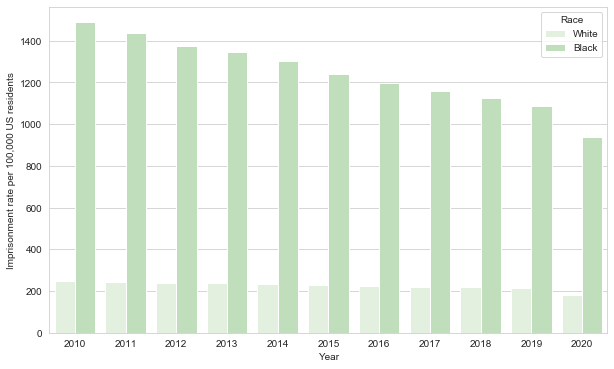

In [7]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imprisonment_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_imprisonment.png'), bbox_inches = 'tight')

**Cumulative Re-arrest rates for 10 years after release (released in 2008)**

In [10]:
white = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'], 
    'Rate': [39.6, 54.8, 63.2, 68.4, 72.3, 75.0, 76.9, 78.3, 79.4, 80.2],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)

black =  {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [45.2, 61.4, 69.7, 75.1, 78.6, 81.1, 82.7, 83.7, 84.7, 85.6], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)

rearrest_rates = pd.concat([white, black], axis = 0)

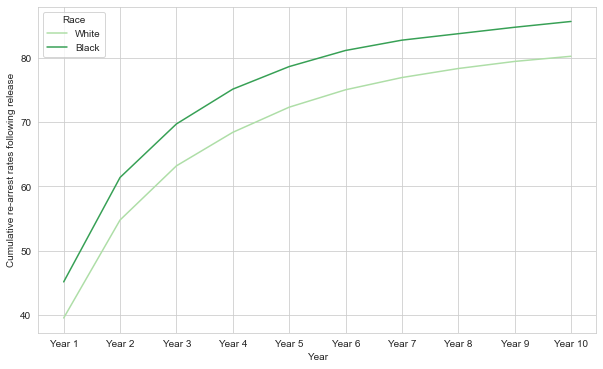

In [16]:
plt.figure(figsize = (10, 6))
ax = sns.lineplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates, palette = sns.color_palette('Greens', 2))
ax.set_ylabel('Cumulative re-arrest rates following release')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_rearrest_line.png'), bbox_inches = 'tight')

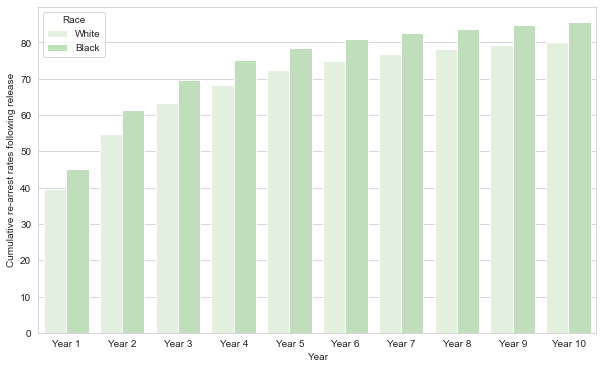

In [15]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates, palette = sns.color_palette('Greens'))
ax.set_ylabel('Cumulative re-arrest rates following release')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'MTHD_rearrest_bar.png'), bbox_inches = 'tight')

#### Old, keep but not needed

In [17]:
white = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
    'Rate': [248, 243, 238, 237, 234, 228, 223, 221, 218, 214, 183],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)
black =  {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1489, 1438, 1377, 1348, 1302, 1239, 1199, 1161, 1124, 1088, 938], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)
hispanic = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [658, 650, 629, 630, 611, 592, 591, 575, 555, 530, 446], 
    'Race': ['Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 
        'Hispanic', 'Hispanic', 'Hispanic']}
hispanic = pd.DataFrame(hispanic)
native = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [1044, 983, 927, 846, 903, 863, 853, 881, 873, 885, 778], 
    'Race': ['Native American', 'Native American', 'Native American', 'Native American', 'Native American', 
        'Native American', 'Native American', 'Native American', 'Native American', 'Native American', 'Native American']} 
native = pd.DataFrame(native)
asian = {'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Rate': [108, 107, 103, 99, 98, 98, 96, 93, 92, 88, 74], 
    'Race': ['Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian']}
asian = pd.DataFrame(asian)
imprisonment_rates_all = pd.concat([white, black, hispanic, native, asian], axis = 0)
imp_rates_wb = pd.concat([white, black], axis = 0)
imp_rates_wbh = pd.concat([white, black, hispanic], axis = 0)

plt.figure(figsize = (16, 8))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imprisonment_rates_all, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'imprisonment_rates_all.png'), bbox_inches = 'tight')

plt.figure(figsize = (10, 7))
ax = sns.barplot(x = 'Year', y = 'Rate', hue = 'Race', data = imp_rates_wbh, palette = sns.color_palette('Greens'))
ax.set_ylabel('Imprisonment rate per 100,000 US residents')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'imprisonment_rates_wbh.png'), bbox_inches = 'tight')

In [18]:
white = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'], 
    'Rate': [39.6, 54.8, 63.2, 68.4, 72.3, 75.0, 76.9, 78.3, 79.4, 80.2],
    'Race': ['White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White']}
white = pd.DataFrame(white)
black =  {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [45.2, 61.4, 69.7, 75.1, 78.6, 81.1, 82.7, 83.7, 84.7, 85.6], 
    'Race': ['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black']}
black = pd.DataFrame(black)
hispanic = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [44.2, 57.8, 65.4, 69.6, 72.8, 75.3, 76.7, 77.5, 78.3, 78.9], 
    'Race': ['Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 'Hispanic', 
        'Hispanic', 'Hispanic']}
hispanic = pd.DataFrame(hispanic)
native = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [50.7, 65.7, 72.8, 76.3, 78.8, 80.8, 82.1, 83.1, 84.3, 84.7], 
    'Race': ['Native American', 'Native American', 'Native American', 'Native American', 'Native American', 
        'Native American', 'Native American', 'Native American', 'Native American', 'Native American']} 
native = pd.DataFrame(native)
asian = {'Year': ['Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5', 'Year 6', 'Year 7', 'Year 8', 'Year 9', 'Year 10'],
    'Rate': [41.3, 57.2, 63.5, 67.2, 68.9, 70.2, 70.8, 73.2, 73.8, 74.4], 
    'Race': ['Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian', 'Asian']}
asian = pd.DataFrame(asian)
rearrest_rates_all = pd.concat([white, black, hispanic, native, asian], axis = 0)
rearrest_rates_wb = pd.concat([white, black], axis = 0)
rearrest_rates_wbh = pd.concat([white, black, hispanic], axis = 0)

plt.figure(figsize = (12, 8))
ax = sns.lineplot(x = 'Year', y = 'Rate', hue = 'Race', data = rearrest_rates_all, palette = sns.color_palette('Greens', 5))
ax.set_ylabel('Cumulative re-arrest rates following release')
sns.set_style('whitegrid')
plt.savefig(os.path.join(RESULTS, 'rearrest_rates_all_line.png'), bbox_inches = 'tight')